<a href="https://colab.research.google.com/github/Jenarth/SCS3250-Group-2-Final-Project/blob/master/VN_Anomaly_Detection_(Finding_Outliers)_WORK_IN_PROGRESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anomaly Detection

## Setup

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline
import numpy as np
#from tabulate import tabulate

#from sklearn.model_selection import train_test_split
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import accuracy_score

## Load Data

In [2]:
path = 'https://raw.githubusercontent.com/Jenarth/SCS3250-Group-2-Final-Project/master/Final%20Dataset.csv'

# Load csv file:
transit_data = pd.read_csv(path, index_col='Date', parse_dates=True)
transit_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2017-03-01 to 2020-02-29
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1096 non-null   int64  
 1   Year                      1096 non-null   int64  
 2   Month                     1096 non-null   int64  
 3   year_month                1096 non-null   object 
 4   Day                       1096 non-null   int64  
 5   Weekday                   1096 non-null   object 
 6   Holiday                   1096 non-null   bool   
 7   Max Temp (°C)             1096 non-null   float64
 8   Min Temp (°C)             1096 non-null   float64
 9   Mean Temp (°C)            1096 non-null   float64
 10  Monthly Mean Temp (°C)    1096 non-null   float64
 11  Delta Temp (°C)           1096 non-null   float64
 12  Total Precip (mm)         1096 non-null   float64
 13  Monthly Mean Precip (mm)  1096 non-null   flo

In [3]:
transit_data.head()

,Unnamed: 0,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Monthly Mean Temp (°C),Delta Temp (°C),Total Precip (mm),Monthly Mean Precip (mm),Delta Precip (mm),Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-01,0,2017,3,2017-03,1,Wednesday,False,13.1,-1.9,5.6,0.116129,5.483871,18.4,2.490323,15.909677,0.0,10022,13585,25273,32909,15599,5639,8804,95802,207633
2017-03-02,1,2017,3,2017-03,2,Thursday,False,-1.3,-6.4,-3.9,0.116129,-4.016129,0.2,2.490323,-2.290323,0.5,9932,13331,26120,33884,15653,5665,8736,95873,209194
2017-03-03,2,2017,3,2017-03,3,Friday,False,-4.3,-8.1,-6.2,0.116129,-6.316129,0.0,2.490323,-2.490323,0.5,8905,12235,23801,31473,14092,5129,7918,87200,190753
2017-03-04,3,2017,3,2017-03,4,Saturday,False,-6.5,-11.9,-9.2,0.116129,-9.316129,0.2,2.490323,-2.290323,0.5,928,480,7872,11756,208,0,246,13899,35389
2017-03-05,4,2017,3,2017-03,5,Sunday,False,-0.4,-10.6,-5.5,0.116129,-5.616129,0.0,2.490323,-2.490323,0.5,803,398,4714,8381,169,0,156,8505,23126


## Inspect

In [4]:
transit_data.describe()

,Unnamed: 0,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Monthly Mean Temp (°C),Delta Temp (°C),Total Precip (mm),Monthly Mean Precip (mm),Delta Precip (mm),Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1.096000e+03,1096.000000,1096.000000,1.096000e+03,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,547.500000,2018.163321,6.521898,15.732664,13.278193,5.717016,9.493568,9.493568,-1.977332e-16,2.482755,2.482755,8.812902e-18,0.010949,8195.403285,9727.687956,20815.320255,29775.717153,10769.945255,3943.779197,6362.017336,71995.220803,161585.091241
std,316.532252,0.897366,3.450561,8.805388,10.944444,9.991125,10.355688,9.542165,4.023351e+00,6.104026,1.251877,5.974273e+00,0.073208,4732.352119,6371.889679,9319.207108,11936.235130,7354.973004,2752.313717,4209.169505,40599.617399,86259.847772
min,0.000000,2017.000000,1.000000,1.000000,-15.400000,-22.300000,-18.900000,-5.358065,-1.451613e+01,0.000000,0.658065,-5.670968e+00,0.000000,307.000000,30.000000,625.000000,5030.000000,4.000000,0.000000,2.000000,4401.000000,14851.000000
25%,273.750000,2017.000000,4.000000,8.000000,4.100000,-1.500000,1.300000,0.635484,-2.425484e+00,0.000000,1.712903,-2.377419e+00,0.000000,2030.000000,712.500000,9469.750000,17397.500000,247.750000,0.000000,368.500000,17126.750000,46647.750000
50%,547.500000,2018.000000,7.000000,16.000000,12.900000,5.250000,8.900000,9.645161,8.333333e-03,0.000000,2.116667,-1.712903e+00,0.000000,10159.500000,13304.000000,25698.000000,35109.500000,14930.500000,5485.500000,8622.000000,95041.500000,209866.000000
75%,821.250000,2019.000000,10.000000,23.000000,23.325000,14.725000,18.800000,19.305000,2.658629e+00,1.400000,3.222581,-6.580645e-01,0.000000,11889.500000,14602.000000,27700.000000,37878.500000,16528.250000,6051.500000,9594.750000,102651.000000,226885.500000
max,1095.000000,2020.000000,12.000000,31.000000,33.800000,23.200000,27.800000,23.480645,1.298387e+01,58.200000,5.670968,5.273226e+01,0.500000,16916.000000,21761.000000,42957.000000,63566.000000,21733.000000,7557.000000,14093.000000,141441.000000,330024.000000


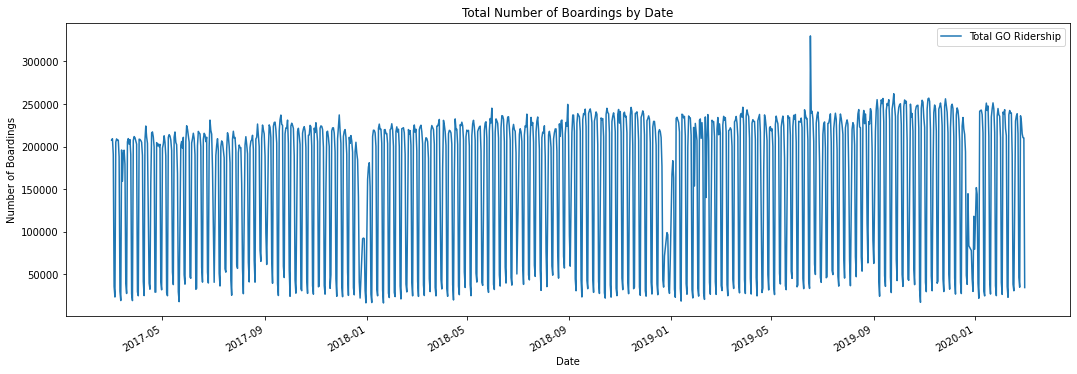

In [28]:
transit_data.loc[-transit_data.Holiday].plot(y='Total GO Ridership', figsize=(18,6))
plt.xlabel('Date')
plt.ylabel('Number of Boardings')
plt.title('Total Number of Boardings by Date');

### Plot Each Weekday

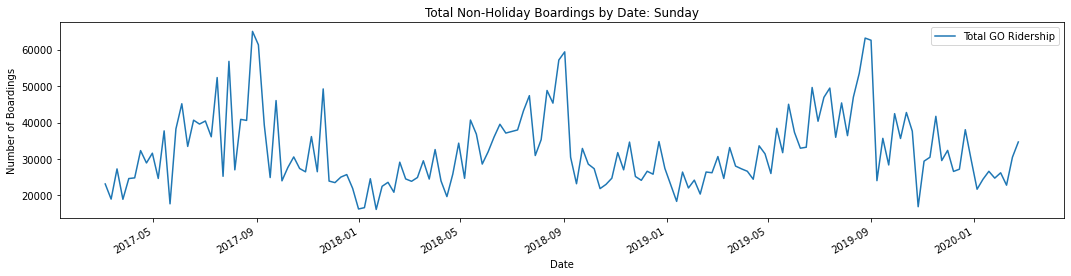

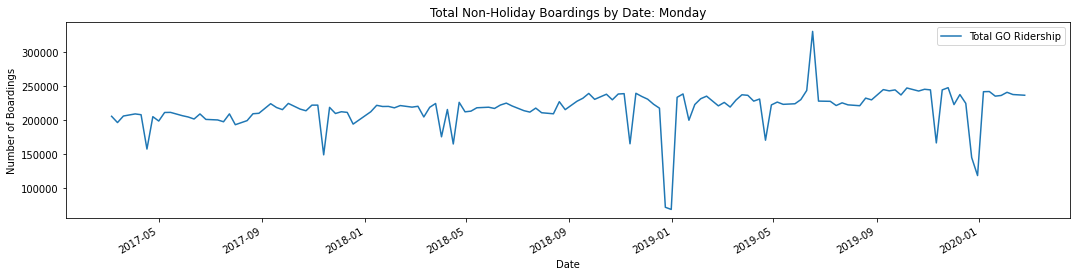

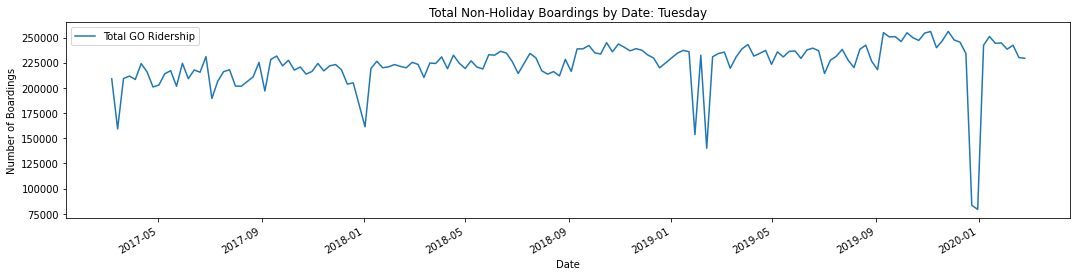

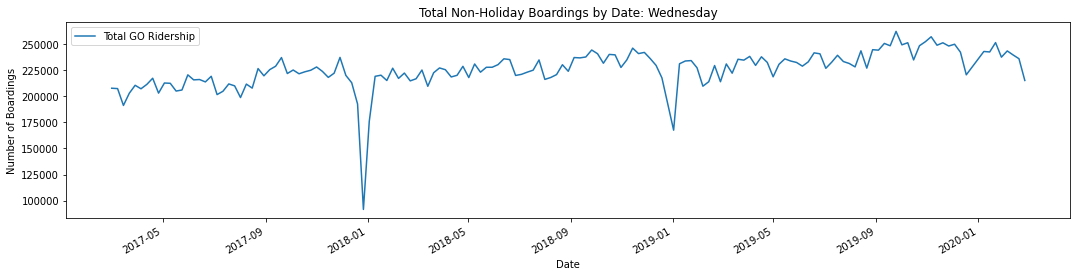

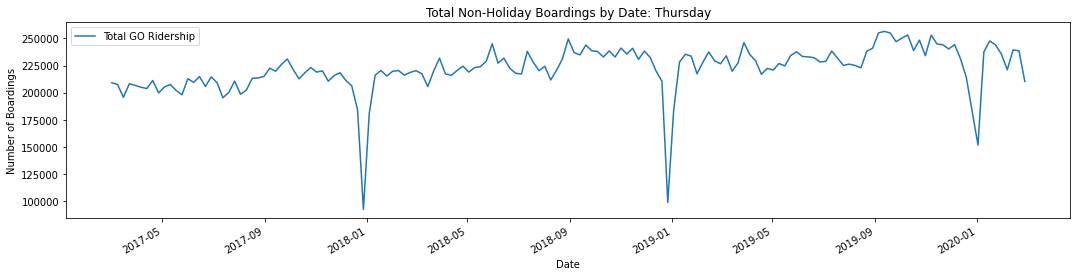

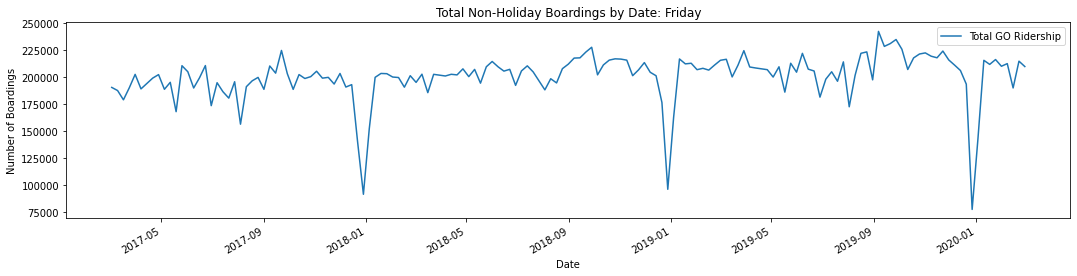

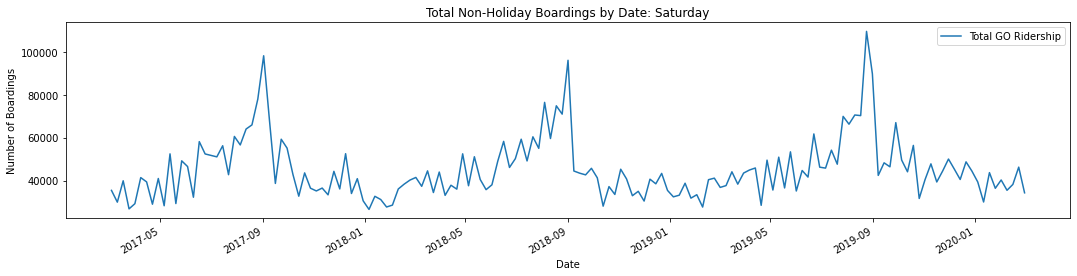

In [164]:
weekdays = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
for day in weekdays:
  transit_data.loc[(-transit_data.Holiday)&(transit_data.Weekday==day)].plot(y='Total GO Ridership', figsize=(18,4))
  plt.xlabel('Date')
  plt.ylabel('Number of Boardings')
  plt.title('Total Non-Holiday Boardings by Date: '+day)

## Enhance

### Add Weekday-Specific Means and Standard Deviations

In [162]:
df_new = df_new.iloc[0:0]
df_new['Overall Mean']=np.NaN
df_new['2SDa']=np.NaN
df_new['2SDb']=np.NaN
weekdays = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
for day in weekdays:
  print(day, len(df_new))
  non_holiday_weekday = (transit_data.Weekday==day)&(-transit_data.Holiday)
  df_new = pd.concat(transit_data.loc[non_holiday_weekday,['Total GO Ridership', 'Holiday', 'Weekday']],df_new)
  df_new['Overall Mean']=transit_data.loc[non_holiday_weekday,'Total GO Ridership'].mean()
  df_new['2SDa']=transit_data.loc[non_holiday_weekday,'Total GO Ridership'].mean() + 2*df_new['Total GO Ridership'].std()
  df_new['2SDb']=transit_data.loc[non_holiday_weekday,'Total GO Ridership'].mean() - 2*df_new['Total GO Ridership'].std()
df_new.iloc[[0,50,150]]

Sunday 0


TypeError: ignored

In [181]:
non_holiday_weekday = (-transit_data.Holiday)
transit_data['Overall Mean']=transit_data.loc[non_holiday_weekday,'Total GO Ridership'].mean()
transit_data['2SDa']=transit_data.loc[non_holiday_weekday,'Total GO Ridership'].mean() + 2*transit_data.loc[non_holiday_weekday,'Total GO Ridership'].std()
transit_data['2SDb']=transit_data.loc[non_holiday_weekday,'Total GO Ridership'].mean() - 2*transit_data.loc[non_holiday_weekday,'Total GO Ridership'].std()
transit_data.head()

,Unnamed: 0,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Monthly Mean Temp (°C),Delta Temp (°C),Total Precip (mm),Monthly Mean Precip (mm),Delta Precip (mm),Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership,Weekday Mean,Std Dev 1,Std Dev 2,Overall Mean,2SDa,2SDb
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-01,0,2017,3,2017-03,1,Wednesday,False,13.1,-1.9,5.6,0.116129,5.483871,18.4,2.490323,15.909677,0.0,10022,13585,25273,32909,15599,5639,8804,95802,207633,225693.136364,NaN,NaN,165490.015977,334473.20874,-3493.176785
2017-03-02,1,2017,3,2017-03,2,Thursday,False,-1.3,-6.4,-3.9,0.116129,-4.016129,0.2,2.490323,-2.290323,0.5,9932,13331,26120,33884,15653,5665,8736,95873,209194,222289.826923,NaN,NaN,165490.015977,334473.20874,-3493.176785
2017-03-03,2,2017,3,2017-03,3,Friday,False,-4.3,-8.1,-6.2,0.116129,-6.316129,0.0,2.490323,-2.490323,0.5,8905,12235,23801,31473,14092,5129,7918,87200,190753,200965.227273,NaN,NaN,165490.015977,334473.20874,-3493.176785
2017-03-04,3,2017,3,2017-03,4,Saturday,False,-6.5,-11.9,-9.2,0.116129,-9.316129,0.2,2.490323,-2.290323,0.5,928,480,7872,11756,208,0,246,13899,35389,45187.147436,NaN,NaN,165490.015977,334473.20874,-3493.176785
2017-03-05,4,2017,3,2017-03,5,Sunday,False,-0.4,-10.6,-5.5,0.116129,-5.616129,0.0,2.490323,-2.490323,0.5,803,398,4714,8381,169,0,156,8505,23126,32232.683871,NaN,NaN,165490.015977,334473.20874,-3493.176785


In [192]:

for day in weekdays:
  non_holiday_weekday = (transit_data.Weekday==day)&(-transit_data.Holiday)

  transit_data.loc[non_holiday_weekday,'Overall Mean']=transit_data.loc[non_holiday_weekday,'Total GO Ridership'].mean()

  transit_data.loc[non_holiday_weekday,'2SDa']=transit_data.loc[non_holiday_weekday,'Total GO Ridership'].mean() + 2*transit_data.loc[non_holiday_weekday,'Total GO Ridership'].std()
  transit_data.loc[non_holiday_weekday,'2SDb']=transit_data.loc[non_holiday_weekday,'Total GO Ridership'].mean() - 2*transit_data.loc[non_holiday_weekday,'Total GO Ridership'].std()
transit_data.head()

,Unnamed: 0,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Monthly Mean Temp (°C),Delta Temp (°C),Total Precip (mm),Monthly Mean Precip (mm),Delta Precip (mm),Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership,Weekday Mean,Std Dev 1,Std Dev 2,Overall Mean,2SDa,2SDb
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-01,0,2017,3,2017-03,1,Wednesday,False,13.1,-1.9,5.6,0.116129,5.483871,18.4,2.490323,15.909677,0.0,10022,13585,25273,32909,15599,5639,8804,95802,207633,225693.136364,NaN,NaN,225693.136364,262465.560107,188920.712620
2017-03-02,1,2017,3,2017-03,2,Thursday,False,-1.3,-6.4,-3.9,0.116129,-4.016129,0.2,2.490323,-2.290323,0.5,9932,13331,26120,33884,15653,5665,8736,95873,209194,222289.826923,NaN,NaN,222289.826923,265244.369491,179335.284356
2017-03-03,2,2017,3,2017-03,3,Friday,False,-4.3,-8.1,-6.2,0.116129,-6.316129,0.0,2.490323,-2.490323,0.5,8905,12235,23801,31473,14092,5129,7918,87200,190753,200965.227273,NaN,NaN,200965.227273,245531.762495,156398.692051
2017-03-04,3,2017,3,2017-03,4,Saturday,False,-6.5,-11.9,-9.2,0.116129,-9.316129,0.2,2.490323,-2.290323,0.5,928,480,7872,11756,208,0,246,13899,35389,45187.147436,NaN,NaN,45187.147436,73588.272816,16786.022055
2017-03-05,4,2017,3,2017-03,5,Sunday,False,-0.4,-10.6,-5.5,0.116129,-5.616129,0.0,2.490323,-2.490323,0.5,803,398,4714,8381,169,0,156,8505,23126,32232.683871,NaN,NaN,32232.683871,52801.048758,11664.318984


In [203]:
#x = x[x.between(x.quantile(.15), x.quantile(.85))] 
sd_filter = (transit_data['Total GO Ridership']<transit_data['2SDa'])&(transit_data['Total GO Ridership']>transit_data['2SDb'])
main_columns = ['Total GO Ridership', 'Overall Mean','2SDa','2SDb','Weekday','Holiday']
temp = transit_data.loc[sd_filter,main_columns]
#main_columns = ['Total GO Ridership', 'Overall Mean','2SDa','2SDb','Weekday']
#temp.loc[-transit_data.Holiday,main_columns].groupby(by='Weekday').plot(figsize=(18,6))
temp.head()

,Total GO Ridership,Overall Mean,2SDa,2SDb,Weekday,Holiday
Date,,,,,,
2017-03-01,207633,225693.136364,262465.560107,188920.712620,Wednesday,False
2017-03-02,209194,222289.826923,265244.369491,179335.284356,Thursday,False
2017-03-03,190753,200965.227273,245531.762495,156398.692051,Friday,False
2017-03-04,35389,45187.147436,73588.272816,16786.022055,Saturday,False
2017-03-05,23126,32232.683871,52801.048758,11664.318984,Sunday,False


Weekday
Friday       AxesSubplot(0.125,0.2;0.775x0.68)
Monday       AxesSubplot(0.125,0.2;0.775x0.68)
Saturday     AxesSubplot(0.125,0.2;0.775x0.68)
Sunday       AxesSubplot(0.125,0.2;0.775x0.68)
Thursday     AxesSubplot(0.125,0.2;0.775x0.68)
Tuesday      AxesSubplot(0.125,0.2;0.775x0.68)
Wednesday    AxesSubplot(0.125,0.2;0.775x0.68)
dtype: object

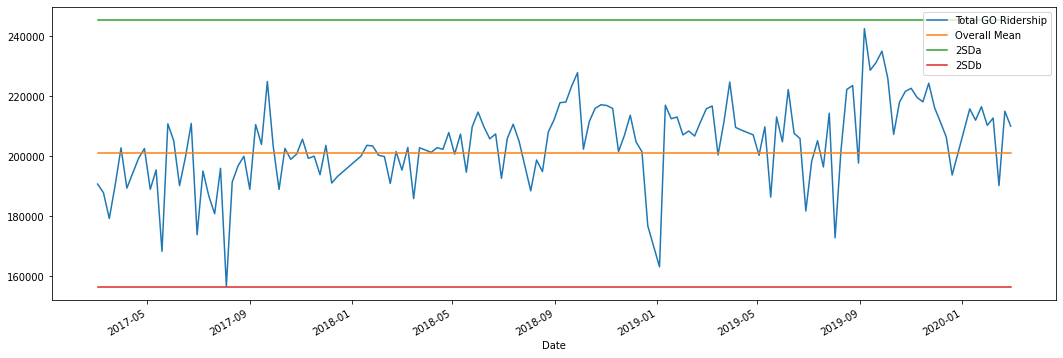

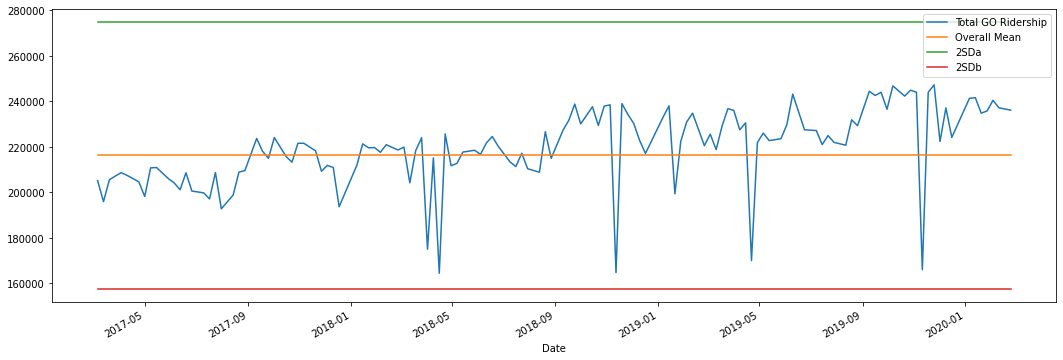

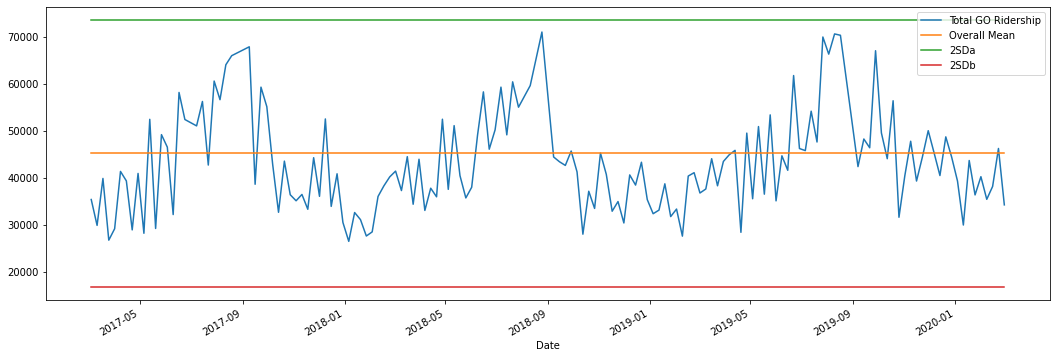

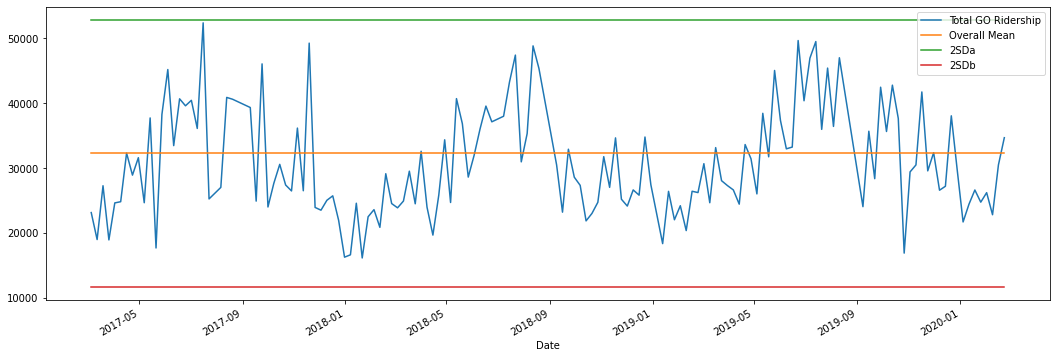

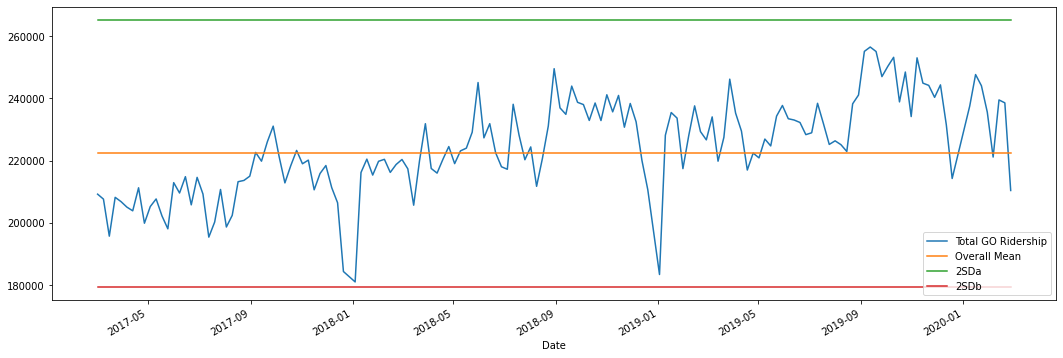

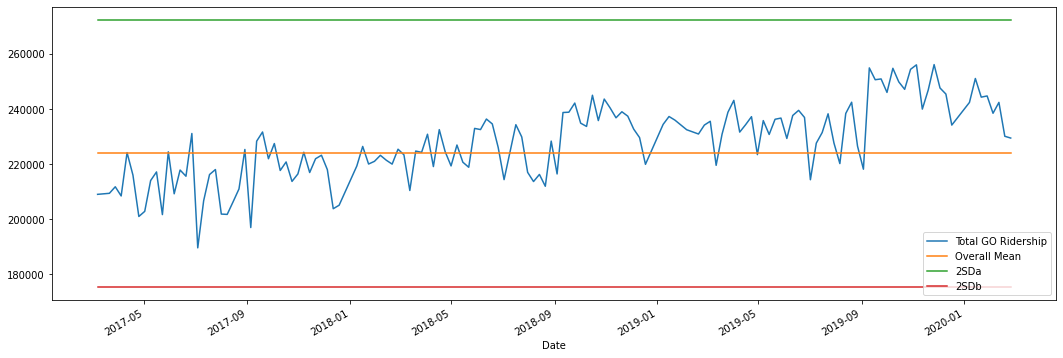

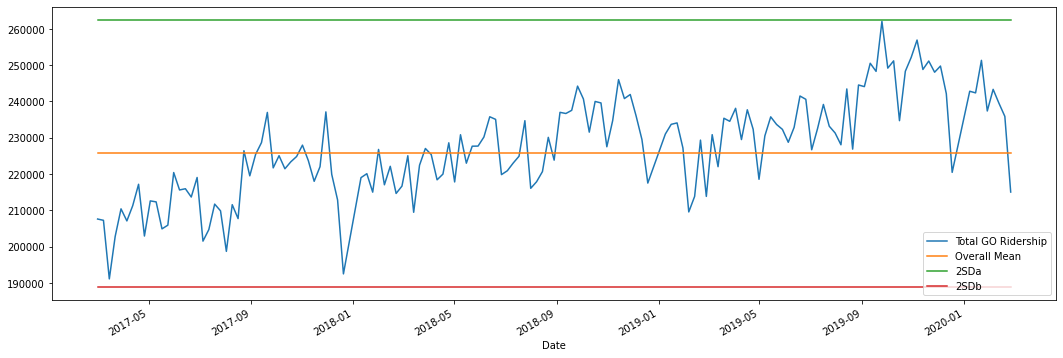

In [204]:
main_columns = ['Total GO Ridership', 'Overall Mean','2SDa','2SDb','Weekday','Holiday']
#temp.loc[:,main_columns].plot(figsize=(18,6))
temp.loc[-temp.Holiday,main_columns].groupby(by='Weekday').plot(figsize=(18,6))

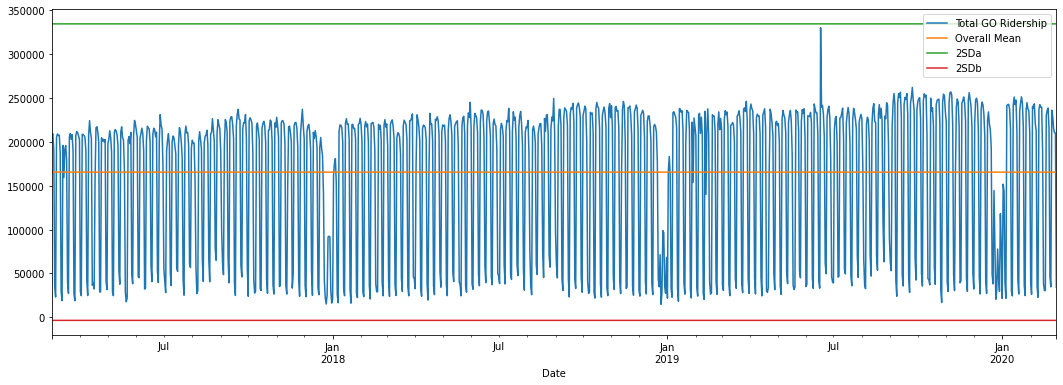

In [184]:
main_columns = ['Total GO Ridership', 'Overall Mean','2SDa','2SDb']
transit_data.loc[:,main_columns].plot(figsize=(18,6))

In [182]:
transit_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2017-03-01 to 2020-02-29
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1096 non-null   int64  
 1   Year                      1096 non-null   int64  
 2   Month                     1096 non-null   int64  
 3   year_month                1096 non-null   object 
 4   Day                       1096 non-null   int64  
 5   Weekday                   1096 non-null   object 
 6   Holiday                   1096 non-null   bool   
 7   Max Temp (°C)             1096 non-null   float64
 8   Min Temp (°C)             1096 non-null   float64
 9   Mean Temp (°C)            1096 non-null   float64
 10  Monthly Mean Temp (°C)    1096 non-null   float64
 11  Delta Temp (°C)           1096 non-null   float64
 12  Total Precip (mm)         1096 non-null   float64
 13  Monthly Mean Precip (mm)  1096 non-null   flo

In [179]:
# Remove all rows
#df_new = df_new.iloc[0:0]
df_new = pd.DataFrame

df_new['Overall Mean']=np.NaN
df_new['2SDa']=np.NaN
df_new['2SDb']=np.NaN

weekdays = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

for day in weekdays:
  # Set filter
  non_holiday_weekday = (transit_data.Weekday==day)&(-transit_data.Holiday)

  df_temp = transit_data.loc[non_holiday_weekday,['Total GO Ridership', 'Holiday', 'Weekday']]
  df_temp['Overall Mean']=transit_data.loc[non_holiday_weekday,'Total GO Ridership'].mean()
  df_temp['2SDa']=transit_data.loc[non_holiday_weekday,'Total GO Ridership'].mean() + 2*transit_data.loc[non_holiday_weekday,'Total GO Ridership'].std()
  df_temp['2SDb']=transit_data.loc[non_holiday_weekday,'Total GO Ridership'].mean() - 2*transit_data.loc[non_holiday_weekday,'Total GO Ridership'].std()
  print(df_temp)
  pd.concat([df_new,df_temp])

  #df_new = pd.concat(transit_data.loc[non_holiday_weekday,['Total GO Ridership', 'Holiday', 'Weekday']],df_new)
  #df_new.concat(transit_data.loc[non_holiday_weekday,['Total GO Ridership', 'Holiday', 'Weekday']])
  #df_new = transit_data.loc[non_holiday_weekday,['Total GO Ridership', 'Holiday', 'Weekday']]
  #df_new['Overall Mean']=transit_data.loc[non_holiday_weekday,'Total GO Ridership'].mean()
  #df_new['2SDa']=transit_data.loc[non_holiday_weekday,'Total GO Ridership'].mean() + 2*df_new['Total GO Ridership'].std()
  #df_new['2SDb']=transit_data.loc[non_holiday_weekday,'Total GO Ridership'].mean() - 2*df_new['Total GO Ridership'].std()
  print(day, len(df_new))
#df_new.iloc[[0,50,150]]
df_new

TypeError: ignored

In [156]:
df_new.head

,Total GO Ridership,Holiday,Weekday,Overall Mean
Date,,,,
2017-03-04,35389,False,Saturday,45187.147436
2017-03-11,29887,False,Saturday,45187.147436
2017-03-18,39870,False,Saturday,45187.147436
2017-03-25,26744,False,Saturday,45187.147436
2017-04-01,29173,False,Saturday,45187.147436


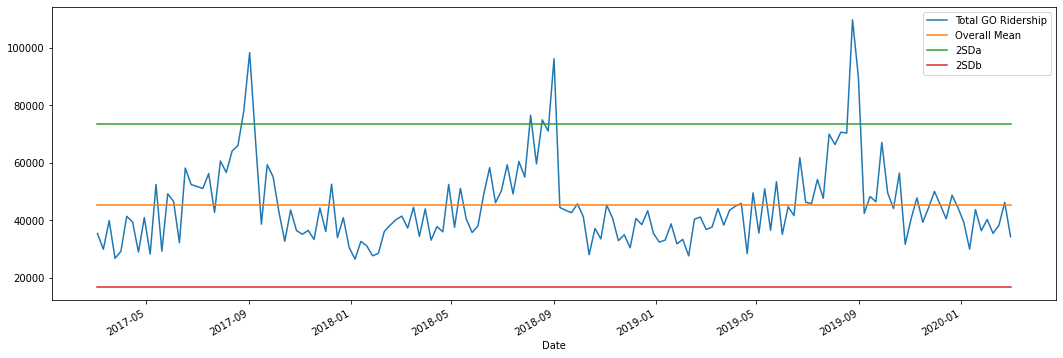

In [159]:
df_new.plot(figsize=(18,6))

In [0]:
# Create list of weekdays
weekdays = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

# Add new column for weekday mean
transit_data['Weekday Mean']=np.NaN
transit_data['Std Dev 1']=np.NaN
transit_data['Std Dev 2']=np.NaN

# Isolate each weekday and add mean and standard deviation
for day in weekdays:
  df_temp = transit_data.loc[(transit_data.Weekday==day)&(-transit_data.Holiday),['Total GO Ridership', 'Holiday', 'Weekday']]
  df_temp['Weekday Mean']=df_temp['Total GO Ridership'].mean()
  df_temp['Std Dev 1'] = df_temp.mean() + 2*df_temp['Total GO Ridership'].std()
  df_temp['Std Dev 2'] = df_temp.mean() - 2*df_temp['Total GO Ridership'].std()
  transit_data.loc[(transit_data.Weekday==day)&(-transit_data.Holiday), 'Weekday Mean'] = df_temp['Weekday Mean']
  # Drop all rows in temp DataFrame
  df_temp.iloc[0:0]
#transit_data['Weekday Mean'] = transit_data.loc[(transit_data.Weekday==day)&(-transit_data.Holiday),['Total GO Ridership', 'Holiday', 'Weekday']]

#transit_data['Overall Mean']=transit_data['Total GO Ridership'].mean()
#transit_data['2SDa']=transit_data['Total GO Ridership'].mean() + 2*transit_data['Total GO Ridership'].std()
#transit_data['2SDb']=transit_data['Total GO Ridership'].mean() - 2*transit_data['Total GO Ridership'].std()
transit_data.tail(20)

In [0]:
weekdays = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
main_columns = ['Total GO Ridership', 'Weekday Mean']
for day in weekdays:
  #transit_data.loc[(-transit_data.Holiday)&(transit_data.Weekday==day), main_columns].plot(y='Total GO Ridership', figsize=(18,4))
  #transit_data.loc[(-transit_data.Holiday)&(transit_data.Weekday==day), main_columns].plot(y='Weekday Mean', figsize=(18,4))
  chart_data = transit_data.loc[(-transit_data.Holiday)&(transit_data.Weekday==day), main_columns]
  x=chart_data.index
  y1=chart_data['Total GO Ridership']
  y2= chart_data['Weekday Mean']
  plt.plot(x,y1,label = 'Total GO Ridership')
  plt.plot(x,y2,label = 'Weekday Mean')
  plt.xlabel('Date')
  plt.ylabel('Number of Boardings')
  plt.title('Total Non-Holiday Boardings by Date: '+day)
  plt.show()

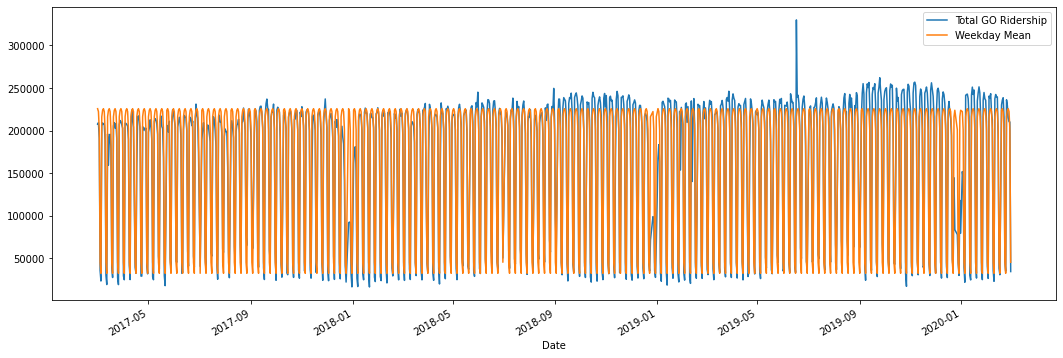

In [129]:
main_columns = ['Total GO Ridership', 'Weekday Mean']
subset = (-transit_data.Holiday)
transit_data.loc[subset, main_columns].plot(figsize=(18,6))

### Other Plots

Text(0.5, 1.0, 'Total Number of Boardings by Date')

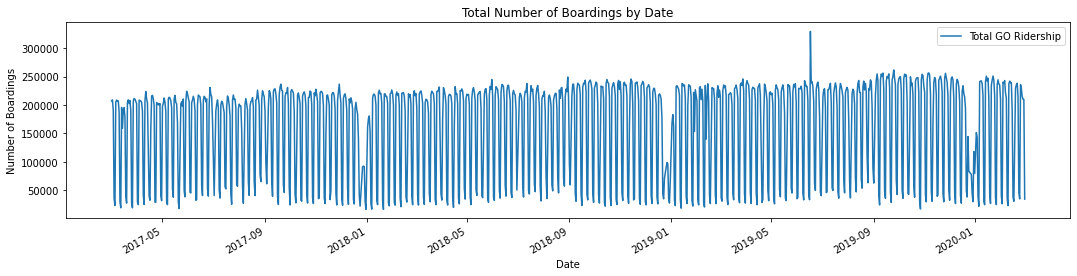

In [113]:

transit_data.loc[-transit_data.Holiday].plot(y='Total GO Ridership', figsize=(18,4))
plt.xlabel('Date')
plt.ylabel('Number of Boardings')
plt.title('Total Number of Boardings by Date')



In [46]:
df_holiday.loc[df_holiday['Holiday']].head()

,Total GO Ridership,Holiday,Weekday
Date,,,
2017-04-14,36499,True,Friday
2017-05-22,21930,True,Monday
2017-07-01,55022,True,Saturday
2017-07-03,28124,True,Monday
2017-08-07,30271,True,Monday


In [94]:
df_holiday = transit_data.loc[(transit_data.Weekday=='Wednesday')&(-transit_data.Holiday),['Total GO Ridership', 'Holiday', 'Weekday']]
#df_holiday['Holiday Boardings']= df_holiday.loc[df_holiday['Holiday'],'Total GO Ridership']
df_holiday['Overall Mean']=df_holiday['Total GO Ridership'].mean()
df_holiday['2SDa']=df_holiday['Total GO Ridership'].mean() + 2*df_holiday['Total GO Ridership'].std()
df_holiday['2SDb']=df_holiday['Total GO Ridership'].mean() - 2*df_holiday['Total GO Ridership'].std()
df_holiday.tail(20)

,Total GO Ridership,Holiday,Weekday,Overall Mean,2SDa,2SDb
Date,,,,,,
2019-10-02,249190,False,Wednesday,225693.136364,262465.560107,188920.71262
2019-10-09,251189,False,Wednesday,225693.136364,262465.560107,188920.71262
2019-10-16,234719,False,Wednesday,225693.136364,262465.560107,188920.71262
2019-10-23,248330,False,Wednesday,225693.136364,262465.560107,188920.71262
2019-10-30,252145,False,Wednesday,225693.136364,262465.560107,188920.71262
2019-11-06,256923,False,Wednesday,225693.136364,262465.560107,188920.71262
2019-11-13,248818,False,Wednesday,225693.136364,262465.560107,188920.71262
2019-11-20,251147,False,Wednesday,225693.136364,262465.560107,188920.71262
2019-11-27,248066,False,Wednesday,225693.136364,262465.560107,188920.71262


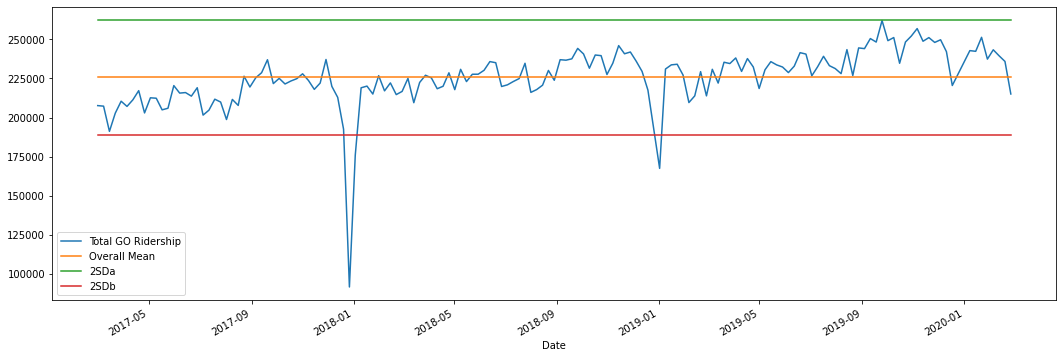

In [95]:
main_columns = ['Total GO Ridership', 'Weekday Mean']
df_holiday.plot(figsize=(18,6))

In [0]:
plt.scatter

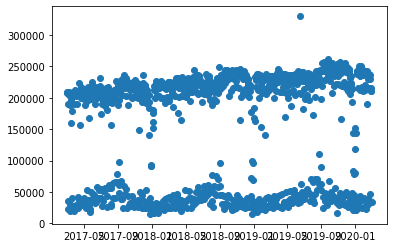

In [70]:
plt.scatter(y=df_holiday['Total GO Ridership'], x=df_holiday.index)#, figsize=(18,6))


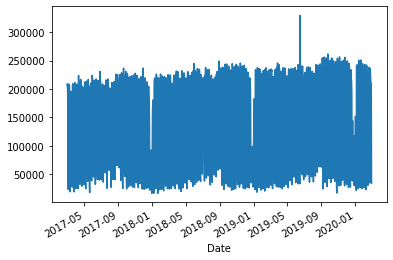

In [24]:
transit_data.loc[-transit_data.Holiday, 'Total GO Ridership'].plot()

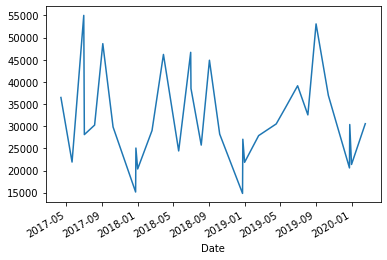

In [25]:
transit_data.loc[transit_data.Holiday, 'Total GO Ridership'].plot()

In [0]:
y1 = transit_data.loc[transit_data['Holiday'], 'Total GO Ridership']
y2 = transit_data.loc[-transit_data['Holiday'], 'Total GO Ridership']
plt.figure(figsize=(18, 6))
plt.
plt.hist(a, bins = 50, alpha=0.5, label='Holidays')
plt.hist(b, bins = 50, alpha=0.5, label='Non-Holidays')
plt.legend(loc='upper right')
plt.xlabel('Date')
plt.ylabel('Number of Boardings')
plt.show();

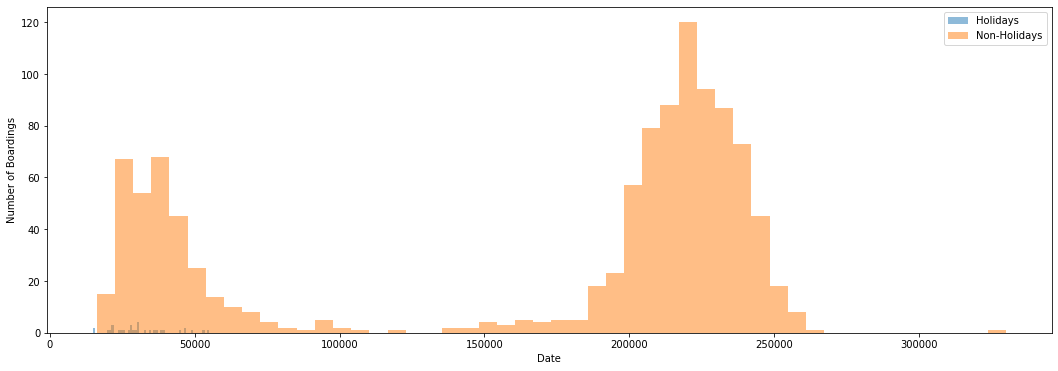

In [7]:
#TEMP!
a = transit_data.loc[transit_data['Holiday'], 'Total GO Ridership']
b = transit_data.loc[-transit_data['Holiday'], 'Total GO Ridership']
plt.figure(figsize=(18, 6))
plt.hist(a, bins = 50, alpha=0.5, label='Holidays')
plt.hist(b, bins = 50, alpha=0.5, label='Non-Holidays')
plt.legend(loc='upper right')
plt.xlabel('Date')
plt.ylabel('Number of Boardings')
plt.show();

In [0]:
transit_data.plot(use_index=True, x='Date', y='Total GO Ridership', figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Number of Boardings')
plt.title('Total Number of Boardings by Date');

In [55]:
x=df_holiday.index.values
x.head()
'''
plt.scatter(x, y, c='green')
plt.plot(np.linspace(0, 1, 10), np.power(np.linspace(0, 1, 10), 2), c= "red", marker='.', linestyle=':')

plt.gca().invert_yaxis()
plt.show()
'''

AttributeError: ignored